# Desafio Cientista de Dados

## 1 - Importação dos pacotes

In [39]:
# Pacotes utilizados nesse relatório

import numpy as np # Cálculos numéricos, base do pandas
import pandas as pd # Manipulação dos dados
import matplotlib.pyplot as plt # Gráficos mais básicos
import seaborn as sns # Gráficos mais elaborados e visualizações estatísticas
import sklearn # Machine learning
import statsmodels.api as sm # estimação de modelos de regressão
import statsmodels # Análise estatística e modelagem
import requests


# Estilo dos gráficos
sns.set_theme(style = 'white',
              palette = 'Set1',
              rc= {
                  "axes.spines.right": False,
                  "axes.spines.top": False,
                  "axes.spines.left": True,
                  "axes.spines.bottom": True,
                  'xtick.bottom': True,
                  'ytick.left': True})

## 2 - Importação da base de dados

In [2]:
# Importação do arquivo .csv com pandas, indicando a codificação dos caracteres como 'utf-8'

df_filmes = pd.read_csv ('desafio_indicium_imdb.csv', encoding= 'utf-8')

## 3 - Análise exploratória

Etapa para entender a estrutura dos dados, identificar padrões, investigar relações que permitam levantar hipóteses e guiar possíveis ações.

###3.1 - Estrutura da base

In [ ]:
# Quantidade de linhas e colunas com o shape

df_filmes.shape

(999, 16)

In [ ]:
# Exibição das 5 primeiras e últimas linhas do dataset com o método display

display(df_filmes)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


### 3.2 - Limpeza de Dados

Etapa para identificar e corrigir problemas existentes nos dados.

In [3]:
# Excluindo possíveis dados duplicados
#Drop_duplicates: remove dados repetidos
df_filmes = df_filmes.drop_duplicates()

# Remoção da coluna 'Unnamed:0', que veio como um índice desnecessário
# Método .drop: remove linhas (axis=0) ou colunas (axis = 1)
# inplace: modifica o dataset original
df_filmes.drop('Unnamed: 0', axis =1, inplace=True)

# Removendo a string 'min' da coluna numérica 'Runtime'(tempo de duração) com o método .replace
df_filmes['Runtime'] = df_filmes['Runtime'].str.replace(" min", "")

# Removendo as vírgulas da coluna 'Gross'(faturamento) com o método .replace
df_filmes['Gross'] = df_filmes['Gross'].str.replace(',', '')

In [ ]:
# Verificando os valores únicos da coluna 'Released_Year'

df_filmes.Released_Year.unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [ ]:
# Visualizando qual filme está com o ano incorreto

df_filmes[df_filmes["Released_Year"] == "PG"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [4]:
# Substituindo o valor 'PG' pelo ano correto de lançamento do Filme 'Apollo 13' do diretor Ron Howard
# fonte: https://www.britannica.com/topic/Apollo-13-film-by-Howard

df_filmes.loc[df_filmes["Released_Year"] == "PG", 'Released_Year'] = 1995

### 3.3 - Tipagem de dados

Etapa para verificar se os tipos dos dados estão corretos.

In [ ]:
# Verificando os tipos de dados

df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [5]:
# As colunas'Released_Year', 'Runtime' são numéricas, mas estão como object, necessitando de uma conversão
# astype: permite conversão dos dados

# Conversão para 'int'
colunas_int= ['Released_Year', 'Runtime']

df_filmes[colunas_int] = df_filmes[colunas_int].astype(int)

# Conversão para 'float'
# A coluna 'Gross' é float
df_filmes['Gross'] = df_filmes['Gross'].astype(float)

### 3.4 - Tratamento dos Dados Ausentes

Etapa para verificar e tratar valores ausentes (NaN)

In [ ]:
# Verificando quais colunas possui valores ausentes

df_filmes.isna().sum()

,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0
Star1,0


In [6]:
#Verificando quais filmes apresentam ao menos uma coluna com valor ausente

# Criação da uma lista de tuplas com o nome e ano dos filmes que possuem alguma coluna com dados ausente
filtro = df_filmes[df_filmes.isna().any(axis=1)] # gera uma dataframe com os filmes que possuem pelo menos algum valor ausente

# Seleciona as colunas 'Series_Title' e 'Released_Year'do dataframe filtro e converte para uma lista de tuplas
filmes_na = list(filtro[['Series_Title', 'Released_Year']].itertuples(index = False, name=None))

# Visualizando os filmes e ano
filmes_na

[('Hamilton', 2020),
 ('Soorarai Pottru', 2020),
 ('Seppuku', 1962),
 ("It's a Wonderful Life", 1946),
 ('Hotaru no haka', 1988),
 ('Ayla: The Daughter of War', 2017),
 ('Vikram Vedha', 2017),
 ('Dangal', 2016),
 ('Taare Zameen Par', 2007),
 ('Once Upon a Time in America', 1984),
 ('Anand', 1971),
 ('Tengoku to jigoku', 1963),
 ('Witness for the Prosecution', 1957),
 ('Paths of Glory', 1957),
 ('Sunset Blvd.', 1950),
 ('The Great Dictator', 1940),
 ('Tumbbad', 2018),
 ('Andhadhun', 2018),
 ('Drishyam', 2013),
 ('Miracle in cell NO.7', 2019),
 ('Babam ve Oglum', 2005),
 ('Idi i smotri', 1985),
 ('Ikiru', 1952),
 ('Ladri di biciclette', 1948),
 ('M - Eine Stadt sucht einen Mörder', 1931),
 ('Metropolis', 1927),
 ('The Kid', 1921),
 ('Chhichhore', 2019),
 ('Uri: The Surgical Strike', 2018),
 ('K.G.F: Chapter 1', 2018),
 ('Talvar', 2015),
 ('Baahubali 2: The Conclusion', 2017),
 ('Klaus', 2019),
 ('Drishyam', 2015),
 ('Queen', 2013),
 ('Mandariinid', 2013),
 ('Bhaag Milkha Bhaag', 2013),
 

Esses são os títulos e os anos de lançamento de filmes que possuem ao menos um valor ausente

In [ ]:
#Quantidade de filmes com pelo menos uma valor ausente

len(filmes_na)

286

#### Buscando os dados faltantes na web (via API OMDb)

Por se tratar de dados de filmes, podemos encontrar parte desses dados ausentes através de uma API (Interface de Programação de Aplicações).


**API OMDb**: https://www.omdbapi.com/

- Crie uma chave pública (1000 requisições diarias maximas)
- Busque o filme pelo título e ano

In [ ]:
# Definindo a chave para acessar a API
# Gere uma chave nesse link: https://www.omdbapi.com/apikey.aspx e insira na variável abaixo

key = input('Insira a chave da API gerada: ')

Insira a chave da API gerada: f2f3bd49


In [8]:
# Definindo a URL base
url = 'http://www.omdbapi.com' #base da API

In [9]:
# Função para buscar filme

def busca_filme(titulo, ano):

  # Normalização do título: retirada do subtítulo para deixar a busca mais precisa e evitar erros
  nome = titulo.split(':')[0].strip()

  # Parâmetros de busca da API:
  params = {'apikey': key, 's': nome, 'type': 'movie', 'y': str(ano)} # Usa a chave especificada para encontrar um filme de acordo com o título e ano

  # Primeira requisição: busca inicial através do título e ano
  r = requests.get(url, params= params).json() # Faz a requisição à API e retorna um json com os dados dos filmes

  # Verificação da resposta da API:
  if r.get('Response') != 'True':
    return{
        'Series_Title': titulo,
        'Released_Year': ano,
        'Rated': None,
        'Meta_score': None,
        'Gross': None} # Retorna um dicionário vazio caso a requisição falhe

  # Iterando através do search para encontrar detalhes dos filmes
  for it in r.get('Search', []):
    if it.get('Year') == str(ano) and (
        nome.lower() in it.get('Title','').lower() or
        titulo.lower() in it.get('Title', '').lower()): # Filtra filmes pelo ano e título

        # Requisição para acessar os detalhes dos filmes
        det = requests.get(url, params = {'apikey': key, 'i':it['imdbID']}).json()

        # Extração e tratamento dos dados:
          # Classificação etária
        Rated = det.get('Rated') if det.get('Rated') != 'N/A' else None # Retorna a classificação caso ela seja diferente de 'N/A'

          # Média das críticas
        Meta_score = det.get('Metascore')
        Meta_score = int(Meta_score) if Meta_score and Meta_score.isdigit() else None # Retorna a média da crítica caso ela esteja disponível e seja um número

          #Faturamento:
        Gross = det.get('BoxOffice')
        Gross = float(Gross.replace('$', '').replace(',', '')) if Gross and Gross != 'N/A' else None # Retorna o faturamento, removendo símbolos e vírgula caso seja diferente de 'N/A'

        return {
          'Series_Title': titulo,
          'Released_Year': ano,
          'Rated': Rated,
          'Meta_score': Meta_score,
          'Gross': Gross
        } #Retorna um dicionário com o título, ano, classificação etária, meta_score e faturamento

  #Caso não encontre resultados:
  return{
        'Series_Title': titulo,
        'Released_Year': ano,
        'Rated': None,
        'Meta_score': None,
        'Gross': None} # Retorna um dicionário vazio caso a requisição falhe

In [10]:
# Buscando na API os filmes que apresentam dados ausentes no dataset
# Irá retornar apenas filmes que apresentam todas as informações

df_na = pd.DataFrame([busca_filme(t, a) for t, a in filmes_na]).dropna(subset=['Rated','Meta_score', 'Gross'])
print(df_na)

                        Series_Title  Released_Year      Rated  Meta_score  \
3              It's a Wonderful Life           1946         PG        89.0   
9        Once Upon a Time in America           1984          R        75.0   
22                             Ikiru           1952  Not Rated        92.0   
25                        Metropolis           1927  Not Rated        98.0   
47                           Stalker           1979  Not Rated        85.0   
51             To Kill a Mockingbird           1962   Approved        88.0   
59                To Be or Not to Be           1942   Approved        86.0   
66                              Soul           2020         PG        83.0   
81                       Underground           1995  Not Rated        79.0   
87                  The Elephant Man           1980         PG        78.0   
88                           Network           1976          R        83.0   
92                           Solaris           1972         PG  

In [11]:
# A classificação etária está como 'Rated', sendo necessário renomeá-la:
# rename: método para renomear colunas

df_na = df_na.rename(columns= {'Rated': 'Certificate'})

#### Imputação dos Dados Ausentes

Vamos preencher os dados ausentes da base de filmes com os dados encontrados na API

In [12]:
#Criando o dataset enriquecido (en):

# Criando uma cópia do nosso dataset
df_filmes_en = df_filmes.copy()

# Colunas com valores ausentes a serem preenchidos
colunas = ['Certificate', 'Meta_score', 'Gross']

# Preenche os valores ausentes com os dados da API de acordo com o nome do filme
for col in colunas:
  df_filmes_en[col] = df_filmes_en[col].fillna(
      df_filmes_en['Series_Title'].str.split(':').str[0].str.strip().map(df_na.set_index('Series_Title')[col])) # como normalizamos o nome na função de busca, precisamos normalizar aqui também (não altera no dataframe)

In [14]:
# Verificando o preenchimento dos dados ausentes

df_filmes_en.isna().sum()

,0
Series_Title,0
Released_Year,0
Certificate,82
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,147
Director,0
Star1,0


Diminuimos a quantidade de valores ausentes, mas nem todos os dados foram encontrados através da API, principalmente dados de filmes mais antigos.

### 3.5 - Análise descritiva

Etapa que visa resumir os dados através de métricas estatística e visualização gráfica

In [ ]:
# Análise descritiva das variáveis numéricas

df_filmes_en.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,852.000000,9.990000e+02,8.530000e+02
mean,1991.218218,122.871872,7.947948,78.012911,2.716214e+05,6.653645e+07
std,23.297166,28.101227,0.272290,12.341444,3.209126e+05,1.087335e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.750000,5.547150e+04,3.108485e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.285893e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,7.732442e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


Através da análise descritiva acima, podemos dizer que:

*  O ano de lançamento dos filmes varia entre 1920 a 2020.

*   A duração dos filmes no dataset varia de 45 min até 321 min (~5 horas), com uma média de duração de ~123 min.

*   A nota de IMDB varia de 7.6 até 9.2, com uma média de 7.95, indicando que nosso dataset apresenta apenas filmes bem avaliados.

*   A média das críticas variou de 12 para 100, mas apresentou uma média de 78 e desvio padrão de 12.3, indicando a presença de possíveis outliers.

*   O número de votos

*  O faturamento variou de 1305 doláres até 936 milhões de doláres, com média de 66.5 milhões, indicando bastante variação.




In [ ]:
# Análise descritiva das variáveis categóricas

df_filmes_en.describe(exclude='number')

,Series_Title,Certificate,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,999,917,999,999,999,999,999,999,999
unique,998,18,202,999,548,659,840,890,938
top,Drishyam,U,Drama,A man in London tries to help a counter-espion...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,2,234,84,1,14,12,7,5,4


A análise descritiva das variáveis categóricas mostrou que:

*   A classificação indicativa mais presente no dataset é a livre (U).

*   O gênero drama é o mais frequente.

*   Temos 548 diretores diferentes, com Alfred Hitchcock o que aparece com maior frequência

*   Os atores Tom Hanks, Emma Watson, Rupert Grint e Michael Caine apresentam uma alta frequência de aparições como atores principais.





#### 4.1 - Distribuição das variáveis

#### Variáveis numéricas

Nessa seção vamos trabalhar com as variáveis numéricas

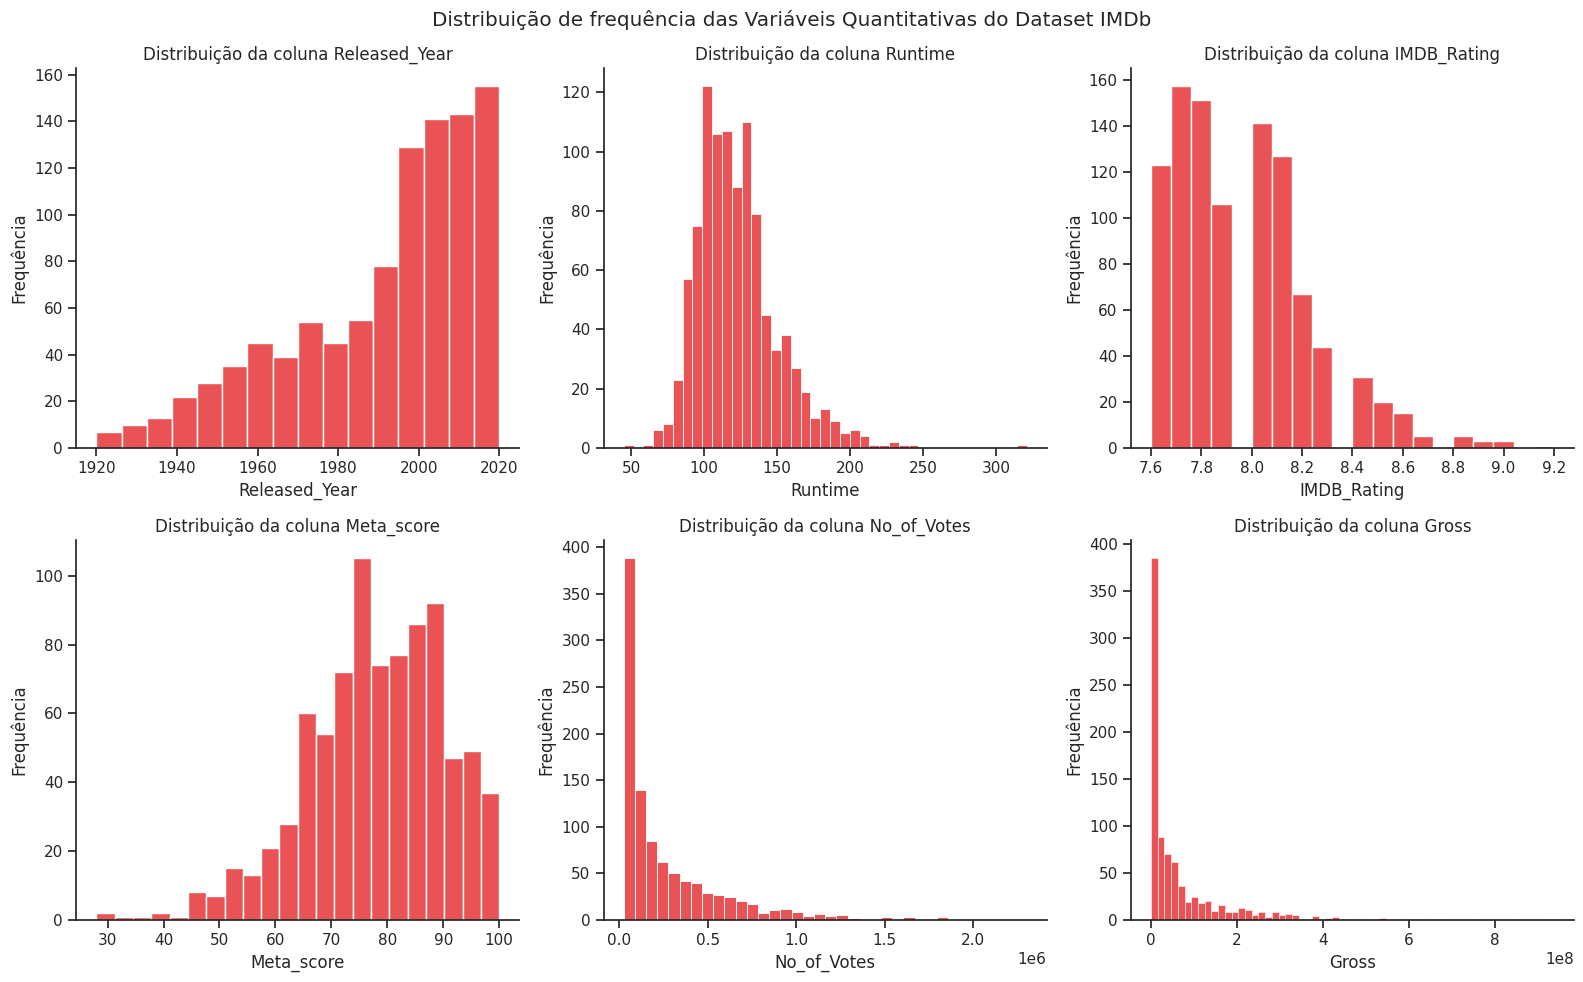

In [40]:
# Histograma: gráfico que permite ver a distribuição de frequências das variáveis

# Definindo quais variáveis usar

var_num = ['Released_Year', 'Runtime', 'IMDB_Rating','Meta_score', 'No_of_Votes', 'Gross']

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10),  tight_layout= True)

axs = axs.flatten() # Permite percorrer a lista com os subplots

for i, coluna in enumerate(var_num):
  sns.histplot(x = coluna, data= df_filmes_en, ax = axs[i])
  axs[i].set_ylabel('Frequência')
  axs[i].set_xlabel(coluna)
  axs[i].set_title(f'Distribuição da coluna {coluna}')
fig.suptitle('Distribuição de frequência das Variáveis Quantitativas do Dataset IMDb');

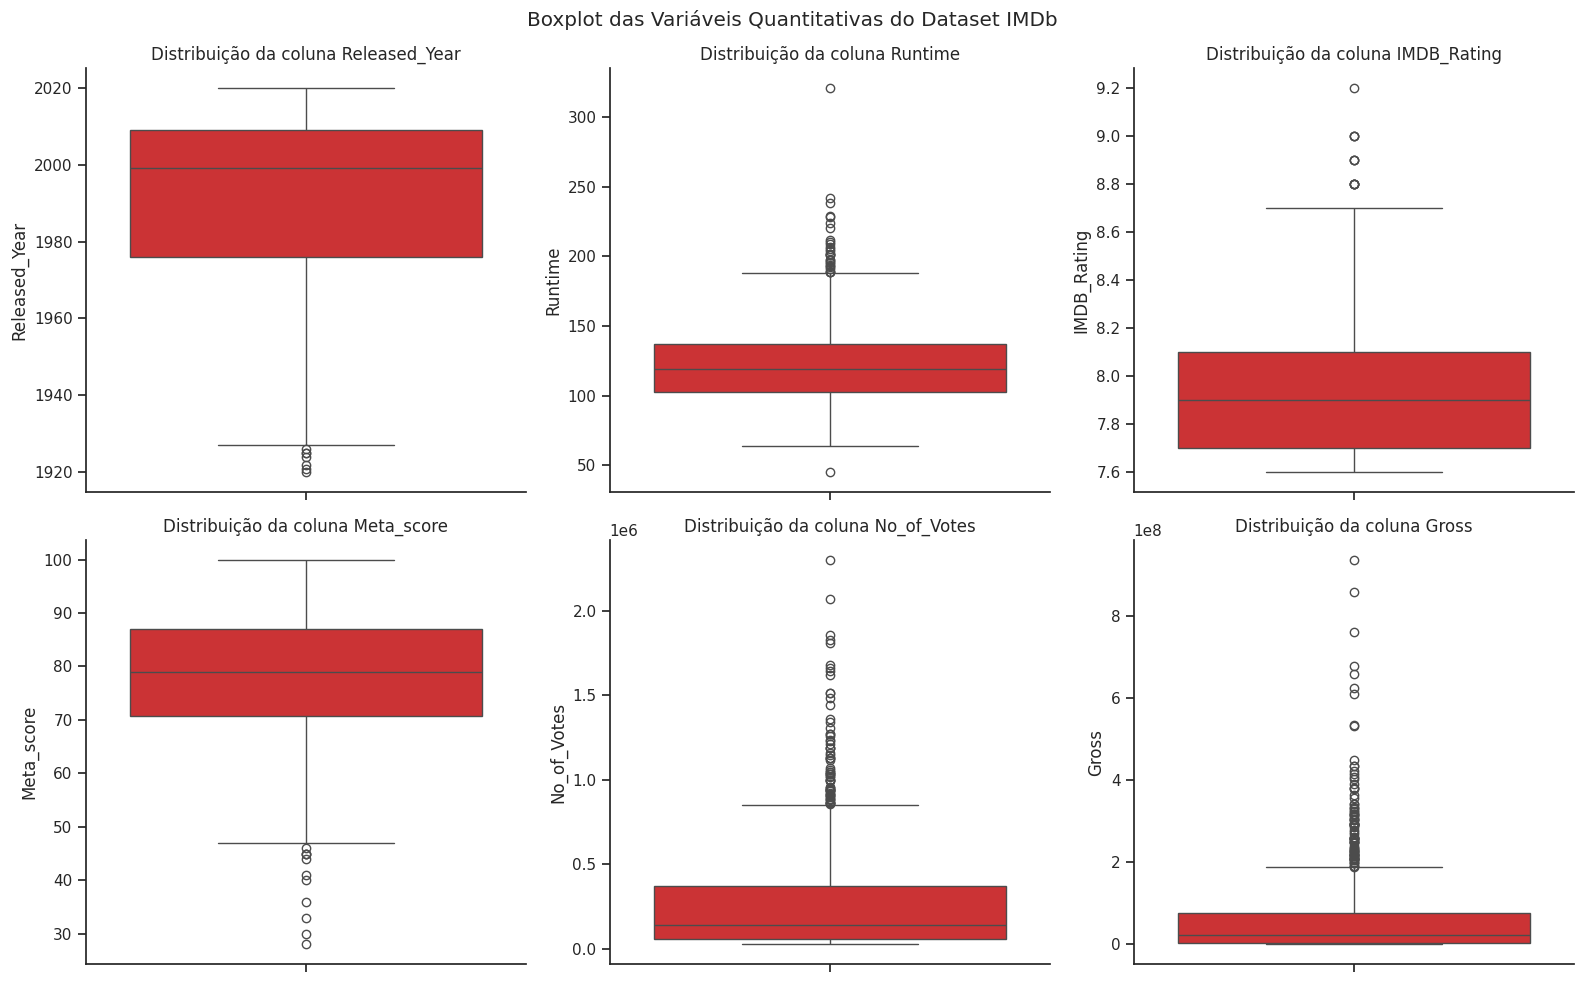

In [41]:
# Box-plot: representação visual da análise descritiva, mostrando o mínimo, mediana, máximo e possíveis outliers.

fig, axs = plt.subplots(figsize = (16,10), nrows= 2, ncols= 3, tight_layout=True, sharey= False)

axs = axs.flatten()

for i, coluna in enumerate(var_num):
  sns.boxplot(df_filmes_en[coluna], ax = axs[i])
  axs[i].set_ylabel(coluna)
  axs[i].set_title(f'Distribuição da coluna {coluna}')
fig.suptitle('Boxplot das Variáveis Quantitativas do Dataset IMDb');

Os histogramas e os boxplots acima mostram que:

*    Os filmes contidos na base foram lançados entre 1920 e 2020, com a maior parte estreando após os anos 2000;

*   O histograma acima mostrou que a duração dos filmes concentra-se entre 100 e 150 minutos;

*   As notas dos filmes se concentram entre 7.6 e 8.2;

*   A média das críticas concentra-se entre 70 e 90;

*   A maior partes dos filmes apresentou menos de meio milhão de votos e faturou menos de um milhão.

*   Dessa forma, os gráficos acima  complementam a análise descritiva inicial.

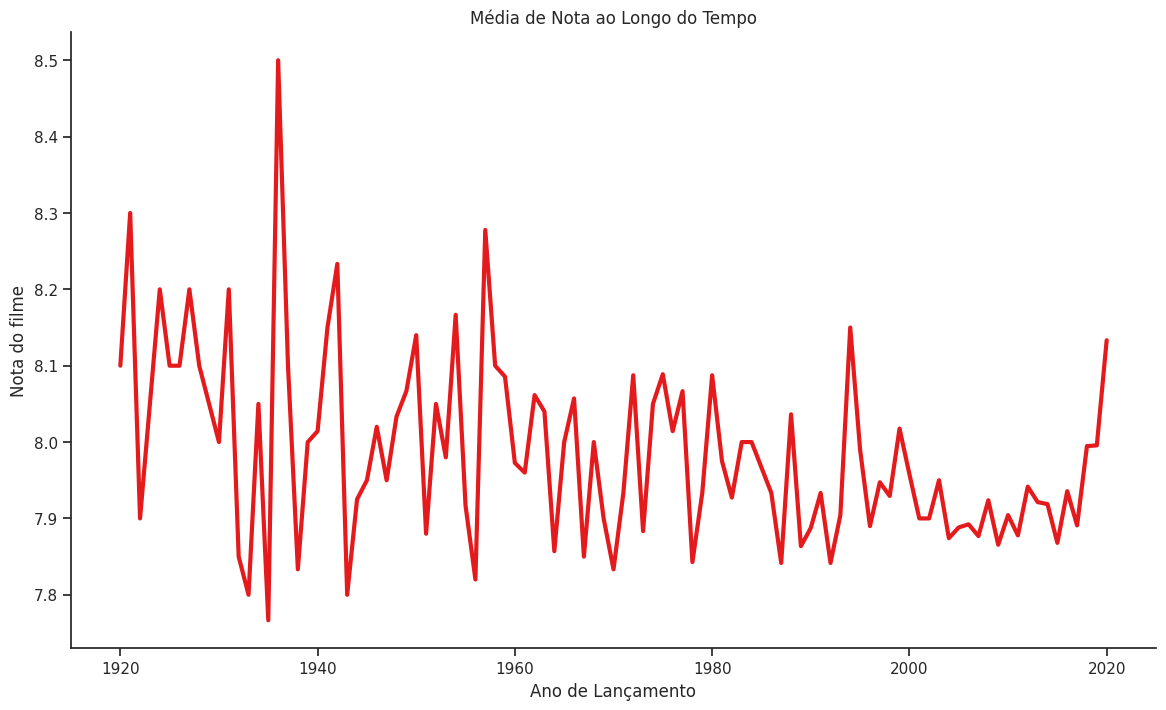

In [42]:
# Hipótese 1: o ano de lançamento afeta a nota do filme

# Calculando a média por ano
media_notas_ano = df_filmes_en.groupby('Released_Year')['IMDB_Rating'].mean().sort_index()

# Criando o gráfico
plt.figure(figsize=(14,8))
sns.lineplot(x = media_notas_ano.index, y = media_notas_ano.values, linewidth =3)
plt.ylabel('Nota do filme')
plt.xlabel('Ano de Lançamento')
plt.title('Média de Nota ao Longo do Tempo');

A partir do gráfico de linhas, observamos uma forte variação nas notas entre 1920 e 1960, com picos em 1930 e 1940. isso pode indicar a presença de filmes clássicos e/ou mudanças nos critério de avaliação. É importante destacar que temos um menor volume de filmes lançados nessa época, o que pode causar um viés nos resultados.

Entre 1960 e 2000, observamos maior estabilidade das notas, o que sugere uma consistência na qualidade dos filmes produzidos nesse período.

A partir dos anos 2000, percebe-se uma tendência de crescimento, possivelmente associada a avanços tecnológicos, mas também ao aumento de espectadores e das críticas registradas.

O aumento repentino em 2020 pode ser motivado pela pandamia do COVID-19

#### Correlação entre as variáveis

Regplot: é um gráfico de dispersão com uma reta de regressão, a qual permite ver a tendência linear entre duas variáveis

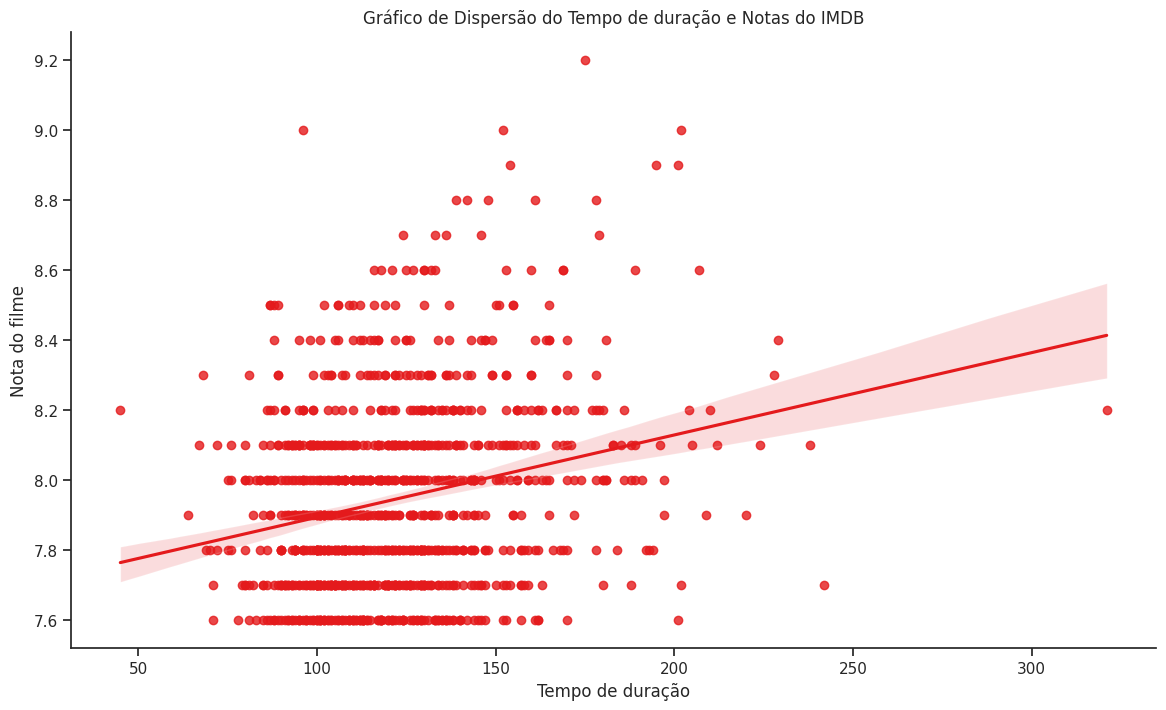

In [43]:
# Hipótese 2: a duração do filme influencia na nota

plt.figure(figsize=(14,8))
sns.regplot(x = df_filmes_en['Runtime'], y = df_filmes_en['IMDB_Rating'])
plt.ylabel('Nota do filme')
plt.xlabel('Tempo de duração')
plt.title('Gráfico de Dispersão do Tempo de duração e Notas do IMDB');

A duração do filme apresenta uma concentração de dados entre 100 e 150, entretanto observamos uma tendência leve positiva entre uma maior duração e nota do IMDb. Isso pode indicar que filmes mais longos são voltados a públicos específicos e/ou apresentam maior desenvolvimento.

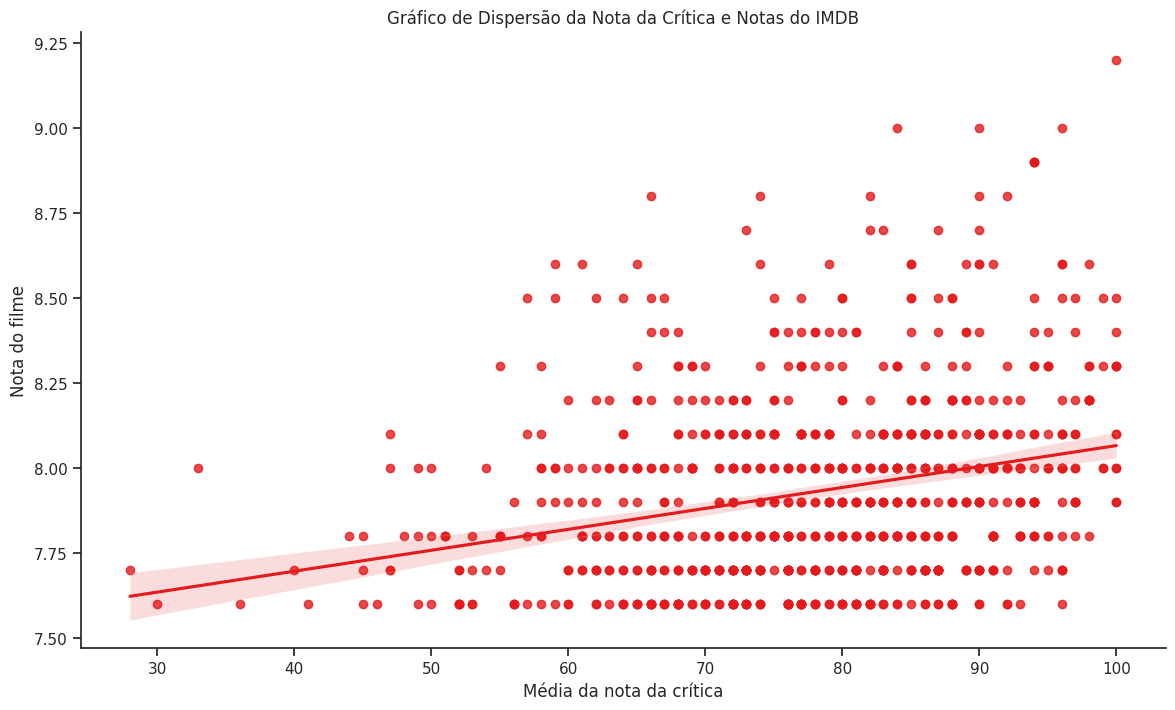

In [44]:
# Hipótese 3: A nota da crítica especializada (meta_score) influencia na nota geral

plt.figure(figsize=(14,8))
sns.regplot(x = df_filmes_en['Meta_score'], y = df_filmes_en['IMDB_Rating'])
plt.ylabel('Nota do filme')
plt.xlabel('Média da nota da crítica')
plt.title('Gráfico de Dispersão da Nota da Crítica e Notas do IMDB');

Quanto maior a nota da crítica, maior tende a ser a nota geral do público (IMDB), indicando um certo consenso entre a opinião dos espectadores e crítica especializada.


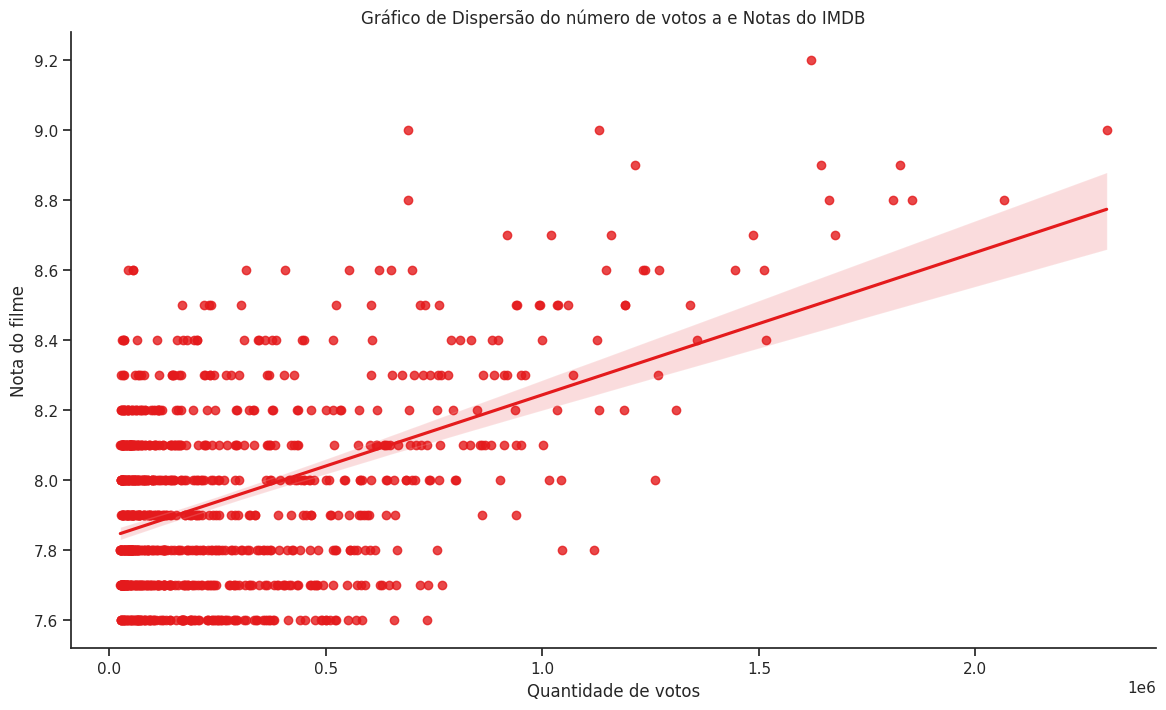

In [45]:
# Hipótese 4: filmes com mais votos influenciam no nota do filme

plt.figure(figsize=(14,8))
sns.regplot(x = df_filmes_en['No_of_Votes'], y = df_filmes_en['IMDB_Rating'])
plt.ylabel('Nota do filme')
plt.xlabel('Quantidade de votos')
plt.title('Gráfico de Dispersão do número de votos a e Notas do IMDB');

O gráfico de dispersão acima evidencia que existe uma relação entre a quantidade de votos e as notas dos filmes, sugerindo que a popularidade influência na avaliação recebida.

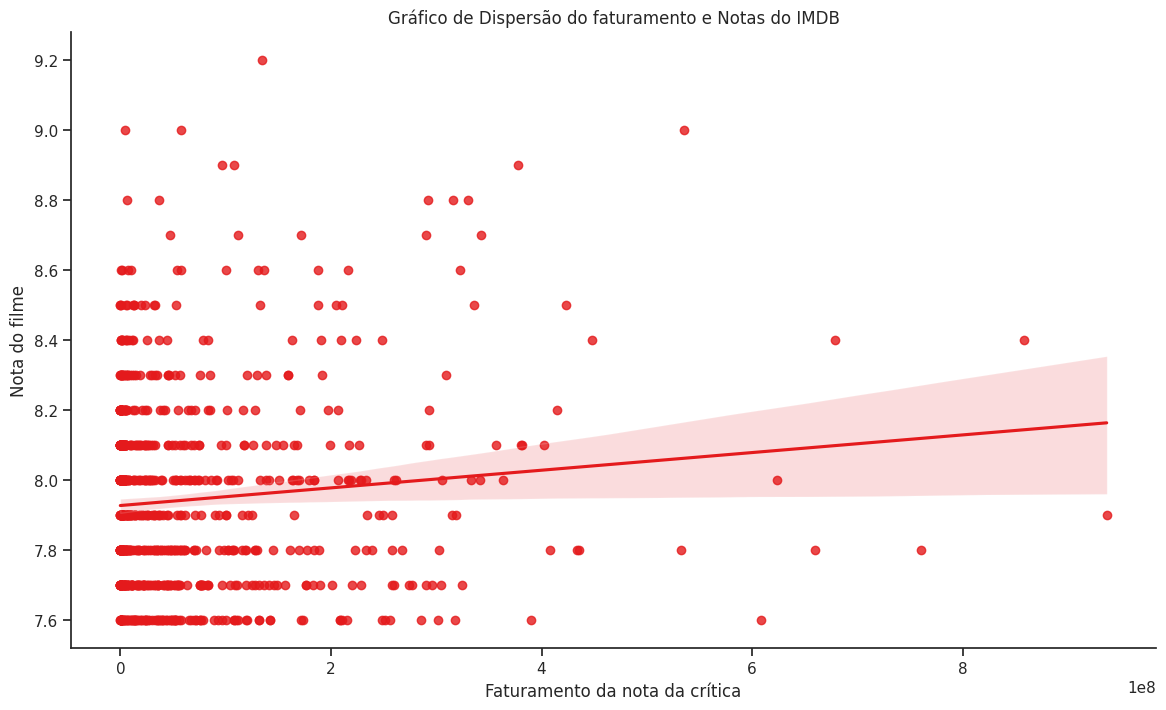

In [46]:
# Hipótese 4: O faturamento influencia na nota do filme

plt.figure(figsize=(14,8))
sns.regplot(x = df_filmes_en['Gross'], y = df_filmes_en['IMDB_Rating'])
plt.ylabel('Nota do filme')
plt.xlabel('Faturamento da nota da crítica')
plt.title('Gráfico de Dispersão do faturamento e Notas do IMDB');

O maior faturamento não implica em uma nota maior

blockbusters


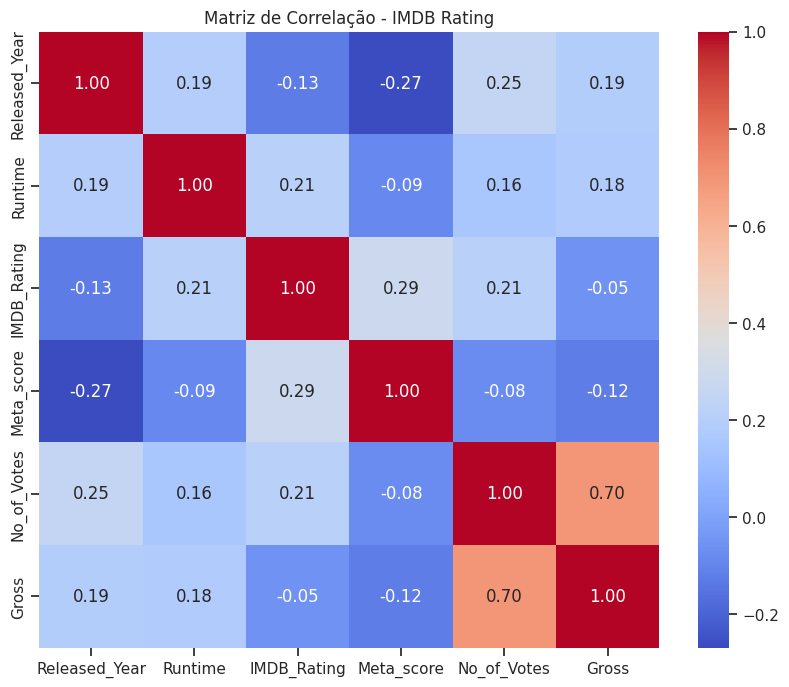

In [19]:
# Matriz de correlação: permite visualizar se as relaçoões encontradas anteriormente são estatísticamente significantes

# Calcula a matriz de correlação
correlacao = df_filmes_en.corr(numeric_only=True, method = 'spearman')

# Exibe a matriz como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - IMDB Rating')
plt.show();

A partir do heatmap, podemos observar:

**1. Variável ano de lançamento (Released_Year):**
*  Correlação positiva fraca(0.25) com número de votos
*  Correlação negativa fraca com meta_score(-0.27)
*  Indica que quanto mais recente é o filme,
mais votos eles têm. Porém, filmes mais recentes apresentam uma menor média de avaliação.

**2. Variável tempo de duração (Runtime):**

* Apresentou uma correlação fraca com a nota do filme

* Correlação baixa com as outras variáveis

**3. Variável nota IMDB (IMDB_Rating):**

*   Correlação moderada positiva (0.29) com meta_score
*   Correlação fraca positiva (0.21) com no_of_Votes
*   Indicação de que filmes bem avaliados pela crítica tendem a também serem avaliados pelo público geral e que filmes bons (com notas altas) tendem a terem mais avaliações

**4. Variável Média de Avaliações (Meta_score):**
*   Correlação positiva com IMDB_Rating(0.29)
*   Correlação negativa e fraca com Gross e Ano de lançamento

**5. Variável Número de votos (No_of_votes):**
*   Correlação forte positiva com Gross(0.70), indicando que filmes que faturam geram mais votos, sendo um bom indicativo.


Logo, a análise de correlação complementou as análises gráficas anteriores.


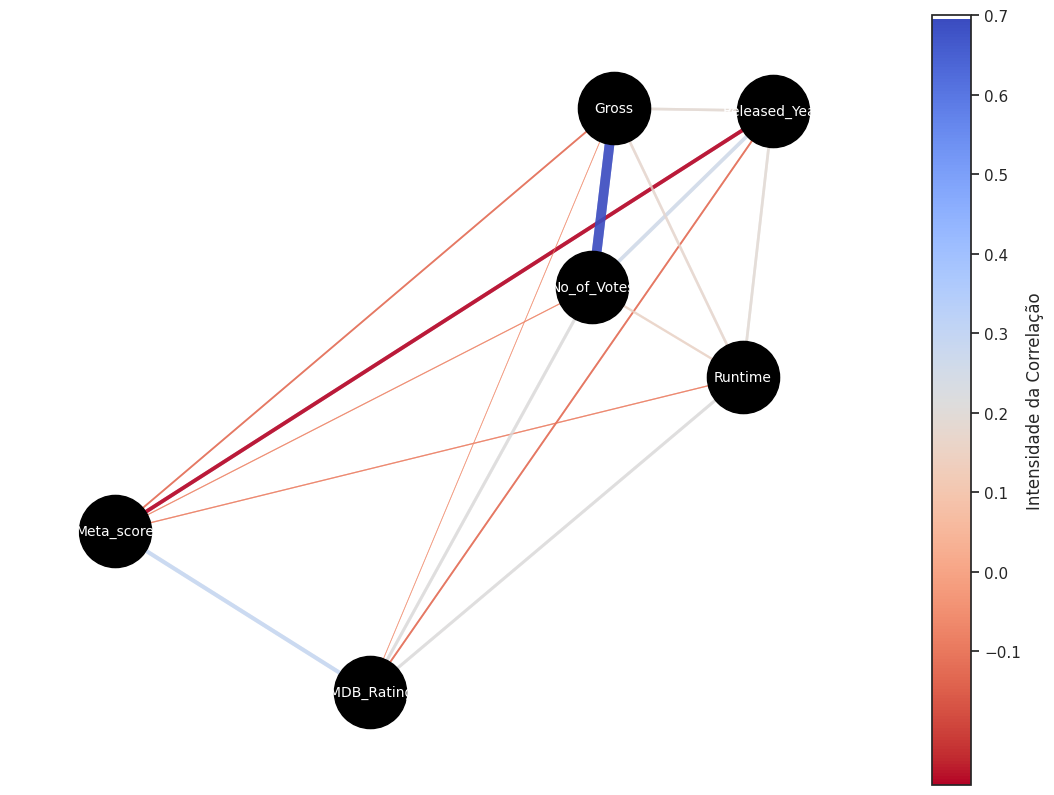

In [47]:
# Podemos avaliar a inter-relação entre as variáveis e a magnitude das correlações entre elas a partir de um grafo

import networkx as nx
import matplotlib.cm as cm

plt.figure(figsize = (14,10))
# Calcula a matriz de correlação
correlacao = df_filmes_en.corr(numeric_only=True, method = 'spearman')

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in correlacao.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(correlacao.columns):
    for j, variable2 in enumerate(correlacao.columns):
        if i != j:
            correlation = correlacao.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão e cor dos nós
node_size = 2700
node_color = 'black'

# Definição da escala de cores das arestas
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo
pos = nx.spring_layout(G, k=0.75, seed=42)  # seed para layout consistente

# Desenho dos nós e das arestas
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Intensidade da Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations),0) - 0.1,
                         max(correlations) + 0.1, 0.1));

O grafo acima permite ver a magnitude da correlação de forma mais dinâmica.

Em resumo, podemos concluir que as variáveis Meta_score, Run_time, No_of_votes são as que apresentam maior correlação com com a nota do filme. A crítica e o público parecem ter um certo alinhamento, o ano de lançamento  e a duração do filme não tem tanto impacto na nota do filme.

#### Segmentação da análise

##### Análise por Gênero


In [75]:
# A coluna 'Genre' apresenta múltiplos gêneros separados por vírgula, então precisamos limpar e padronizar
# Uma maneira de lidar com essa coluna é criar variáveis dummmy (variáveis binárias), criando uma coluna para cada gênero
# 1 representa se o filme pertence ao gênero e 0 que não pertence

# Normalizando o nome dos generos
df_filmes_en['Genre'] = df_filmes_en['Genre'].str.lower().apply(lambda x: ','.join([g.strip() for g in x.split(',')]))
# Coloca os gêneros em minísculo e retira todos os espaços

# Criando variáveis binárias para cara gênero
dummies  = df_filmes_en['Genre'].str.get_dummies(sep = ',') #cria um dataframe com as variáveis dummies

# Concatenando as dummies com as outras variáveis em um novo dataframe
df_filmes_en_dummies = pd.concat ([df_filmes_en, dummies], axis = 1)

# Visualizando as colunas criadas
df_filmes_en_dummies.columns


Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical',
       'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western'],
      dtype='object')

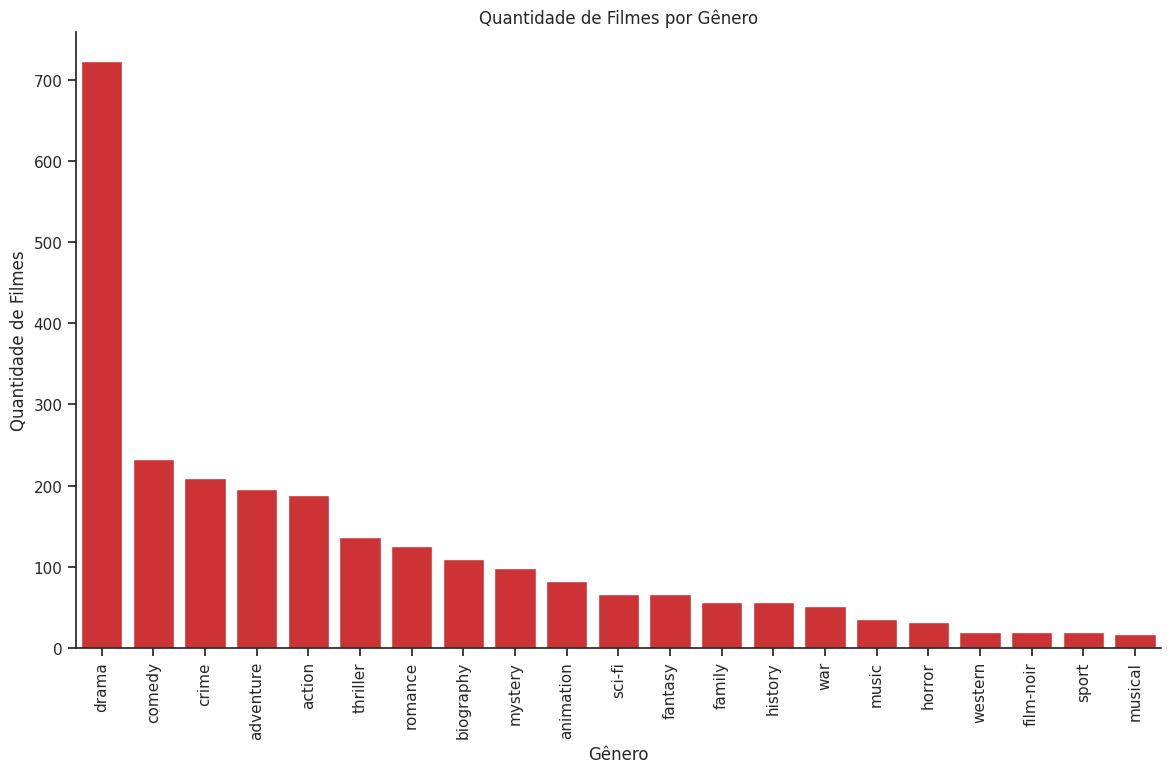

In [76]:
# Ver quantos filmes de cada gênero existem no dataset

qtd_generos = dummies.sum().sort_values(ascending = False)

# Gráfico de barra com a quantidade de filmes por gênero (mais fácil de visualizar)
plt.figure(figsize=(14,8))
sns.barplot(x = qtd_generos.index, y=qtd_generos.values)
plt.xticks(rotation = 90)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes por Gênero');

O gênero drama é o que aparece com mais frequência na base.

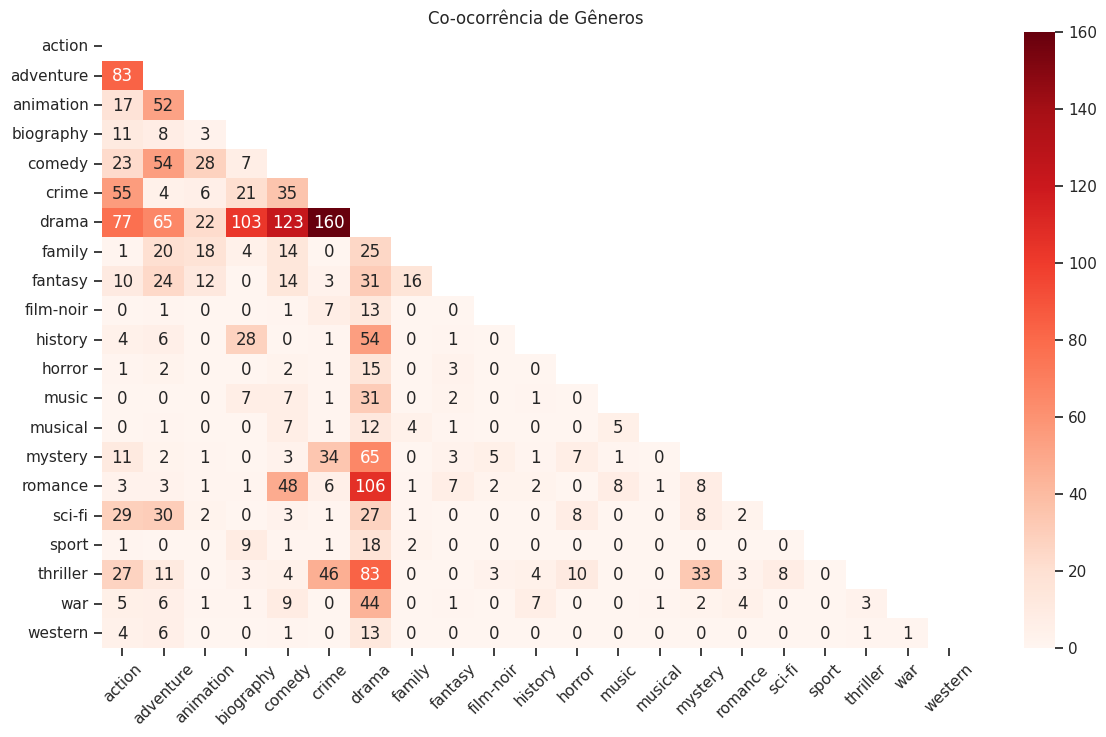

In [84]:
# Co-ocorrência de genêros: quais gêneros aparecem juntos com mais frequência

# Criação de uma matriz de co-ocorrência
co_ocorrencia = dummies.T.dot(dummies)

# Criação do gráfico

mask = np.triu(np.ones_like(co_ocorrencia, dtype = bool)) # Criação de uma máscara para mostrar apenas uma parte do gráfico e evitar duplicação
plt.figure(figsize=(14,8))
sns.heatmap(co_ocorrencia, annot= True, fmt = 'd', cmap = 'Reds', mask = mask)
plt.xticks(rotation = 45)
plt.title('Co-ocorrência de Gêneros');

Os gêneros drama/comédia são os mais co-ocorrentes, seguidos de drama/romance e  biografia/drama.

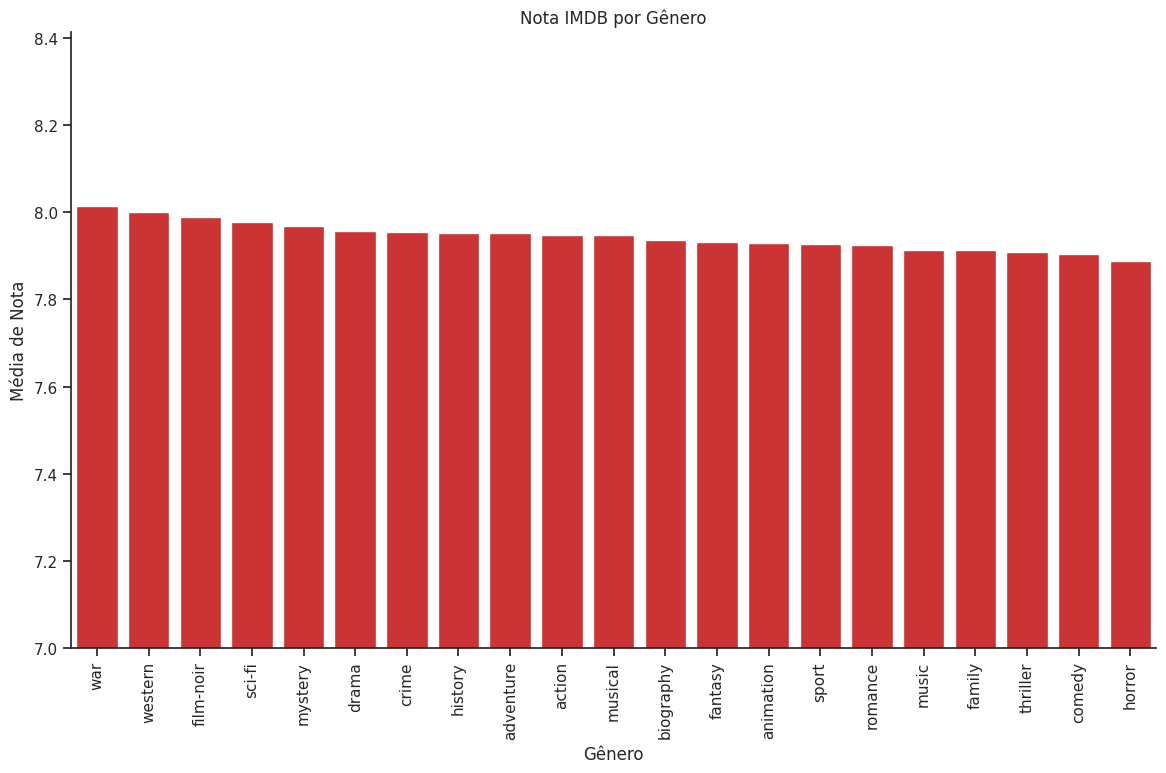

In [78]:
# Gêneros com maiores notas
# Vamos visualizar a média de nota por gênero de filme

# Selecionando todos os gêneros
generos = dummies.columns

media_genero = {}

for genero in generos:
  notas = df_filmes_en_dummies.loc[df_filmes_en_dummies[genero] == 1, 'IMDB_Rating']
  media = notas.mean()
  media_genero[genero] = media

ranking_media = pd.Series(media_genero).sort_values(ascending=False)
#colocar escala minima no 6
# Plotando a média por gênero
plt.figure(figsize=(14,8))
sns.barplot(x = ranking_media.index, y=ranking_media.values)
plt.xticks(rotation = 90)
plt.xlabel('Gênero')
plt.ylabel('Média de Nota')
plt.ylim(7,)
plt.title('Nota IMDB por Gênero');

O gênero do filme não influencia na nota do filme.

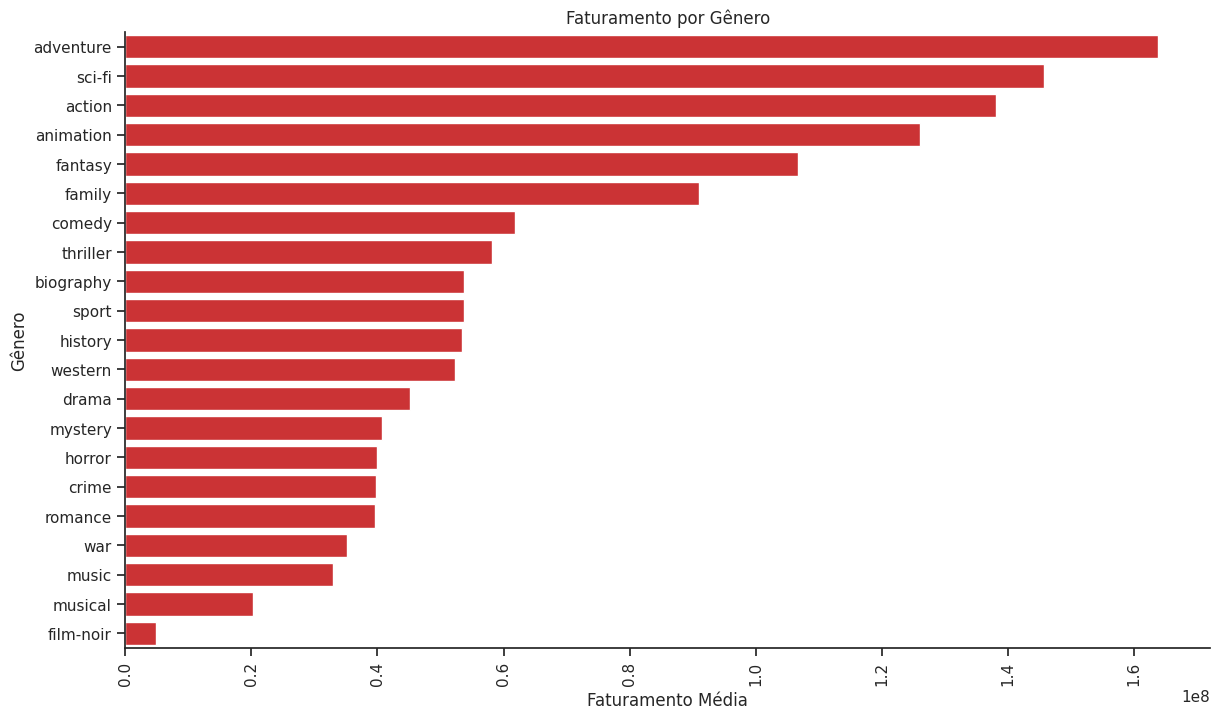

In [51]:
#Vamos visualizar o faturamento por gênero de filme

generos = dummies.columns

fat_genero = {}

for genero in generos:
  notas = df_filmes_en_dummies.loc[df_filmes_en_dummies[genero] == 1, 'Gross']
  faturamento = notas.mean()
  fat_genero[genero] = faturamento

ranking_fat = pd.Series(fat_genero).sort_values(ascending=False)

# Plotando a média por gênero

plt.figure(figsize=(14,8))
sns.barplot(y = ranking_fat.index, x=ranking_fat.values)
plt.xticks(rotation = 90)
plt.ylabel('Gênero')
plt.xlabel('Faturamento Média')
plt.title('Faturamento por Gênero');

Embora o gênero não apresente impacto na nota dos filmes, ele parece influenciar o faturamento. Gênero como aventura, ficção científica, ação, animação e fantasia apresentam as maiores receitas.

##### Análise por Classificação etária

Vamos analisar se a classificação etária tem alguma influência na nota do filme

In [26]:
# Padronizando a classificação, pois não possuem um padrão
# Fonte: https://pt.wikipedia.org/wiki/Sistema_de_classifica%C3%A7%C3%A3o_de_filmes_da_Motion_Picture_Association

classificação ={
    'G': 'G', # Classificação Geral
    'U': 'G', # U equivale ao Geral
    'PG': 'PG', # Recomendado para a orientação dos pais
    'GP': 'PG', # É o antecessor o do PG
    'TV-PG': 'PG',
    'PG-13': 'PG-13',
    'U/A': 'PG-13',
    'UA': 'PG-13',
    'TV-14': 'PG-13',
    'R': 'R', #R: restrito
    '16': 'R',
    'TV-MA': 'R',
    'Unrated': 'Unrated',
    'Approved':'Unrated',
    'Passed':'Unrated',
    'A': 'Unrated',
    'nan':'Unrated'
 }

 #Aplicando a classificação na coluna 'Certificate
df_filmes_en_dummies['Certificate'] = df_filmes_en_dummies['Certificate'].map(classificação)

# Obtendo a média de classificação
media_classificaçao = df_filmes_en_dummies.groupby('Certificate')['IMDB_Rating'].mean().sort_values()
media_classificaçao

,IMDB_Rating
Certificate,
R,7.872000
PG,7.921429
PG-13,7.925909
G,7.978049
Unrated,7.992713


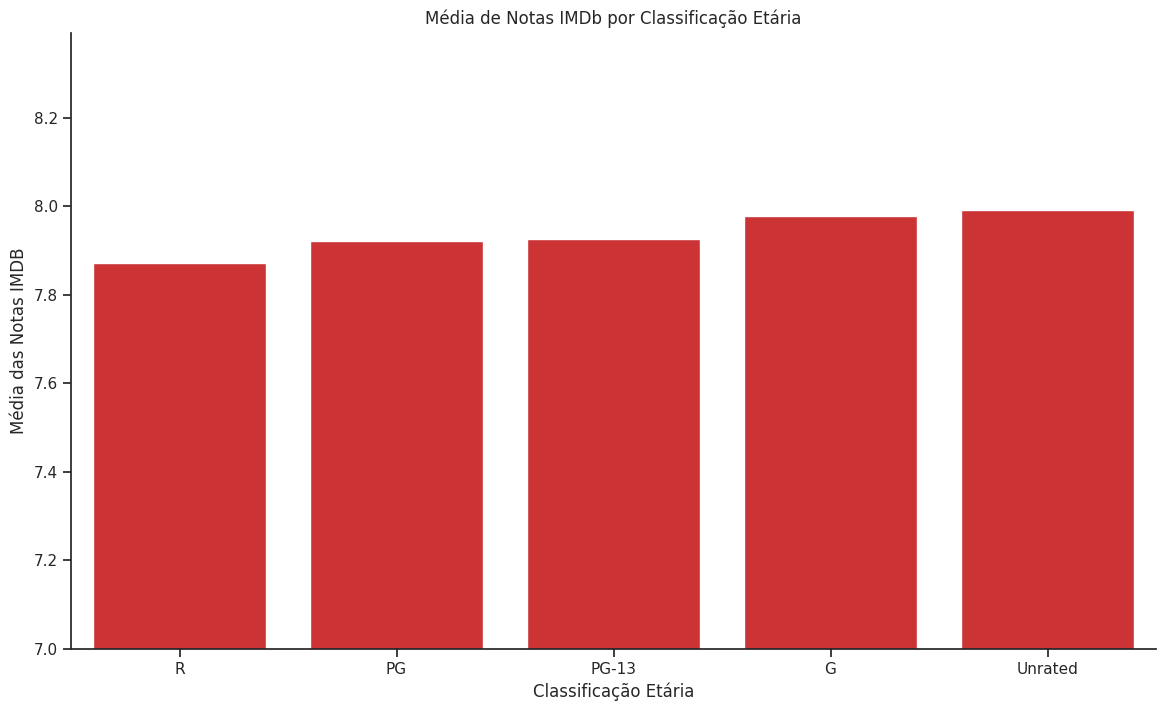

In [67]:
# Plotando a média por classificação etária
#mudar escala
plt.figure(figsize=(14,8))
sns.barplot(x= media_classificaçao.index, y =media_classificaçao.values)
plt.ylabel('Média das Notas IMDB')
plt.xlabel('Classificação Etária')
plt.ylim(7,)
plt.title('Média de Notas IMDb por Classificação Etária');

A classificação etária não parece influenciar na nota do filme.

##### Análise da nota por diretor

In [28]:
# Vamos avaliar se o diretor influencia na nota
#ANOVA: verificar se a variação das notas pode ser explicada pela diferente entre diretores

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Vamos analisar apenas diretores com mais de cinco filmes:
qtd_filmes_dir = df_filmes_en_dummies['Director'].value_counts()

# Filtrando apenas quantidade de filmes >5:
diretores_anova = qtd_filmes_dir[qtd_filmes_dir > 5].index
df_anova = df_filmes_en_dummies[df_filmes_en_dummies['Director'].isin(diretores_anova)]

# Rodando a ANOVA
anova = ols('IMDB_Rating ~ C(Director)', data = df_anova).fit()

# Visualizando o resultado
anova_tabela = sm.stats.anova_lm(anova, typ= 2)
print(anova_tabela)


                sum_sq     df         F    PR(>F)
C(Director)   5.825670   21.0  3.585981  0.000002
Residual     12.222941  158.0       NaN       NaN


Pelo resultado da ANOVA acima, vemos que o diretor influencia sim na nota do filme (P<0.05).


O resultado da ANOVA não diz quais diretores influenciam, nem a magnitude.


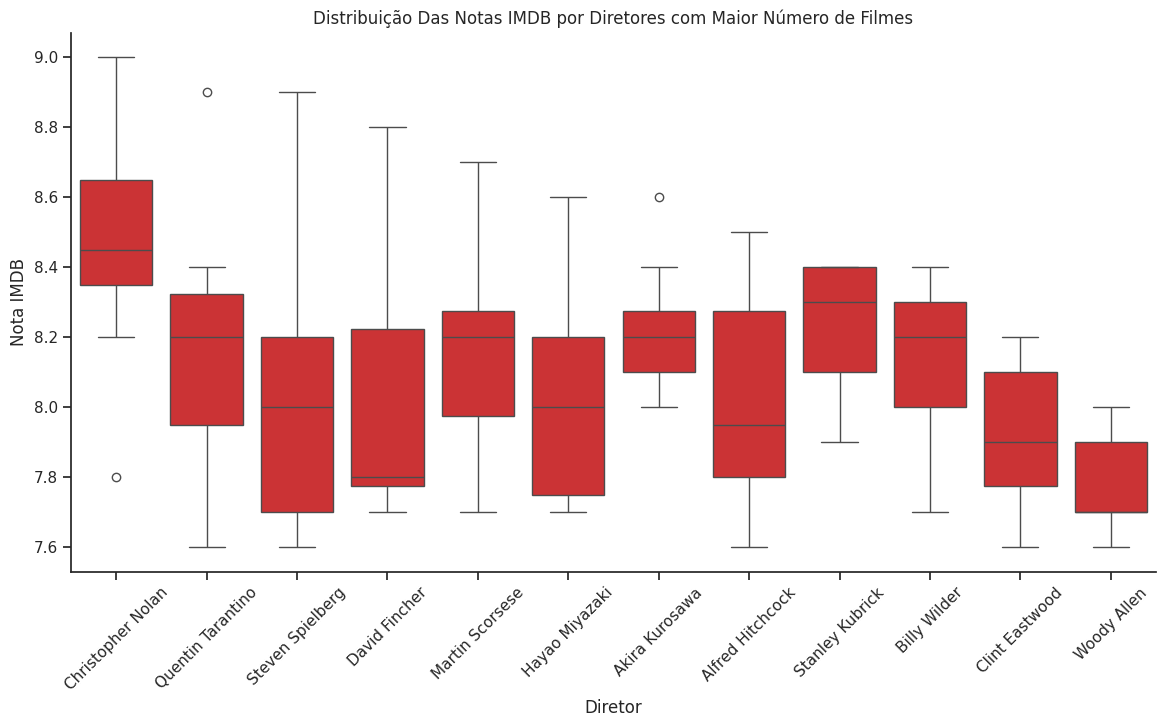

In [53]:
# Plotando os 12 diretores com mais filmes

# Selecionando apenas os 12 melhores diretores
diretores_graf = qtd_filmes_dir.head(12).index
df_top12 = df_anova[df_anova['Director'].isin(diretores_graf)]

plt.figure(figsize= (14, 7))
sns.boxplot(x= 'Director', y='IMDB_Rating', data = df_top12)
plt.xticks(rotation = 45)
plt.title('Distribuição Das Notas IMDB por Diretores com Maior Número de Filmes')
plt.xlabel('Diretor')
plt.ylabel('Nota IMDB');

O diretor aparecente exercer influência sobre a nota do filme.

##### Análise da nota por franquia

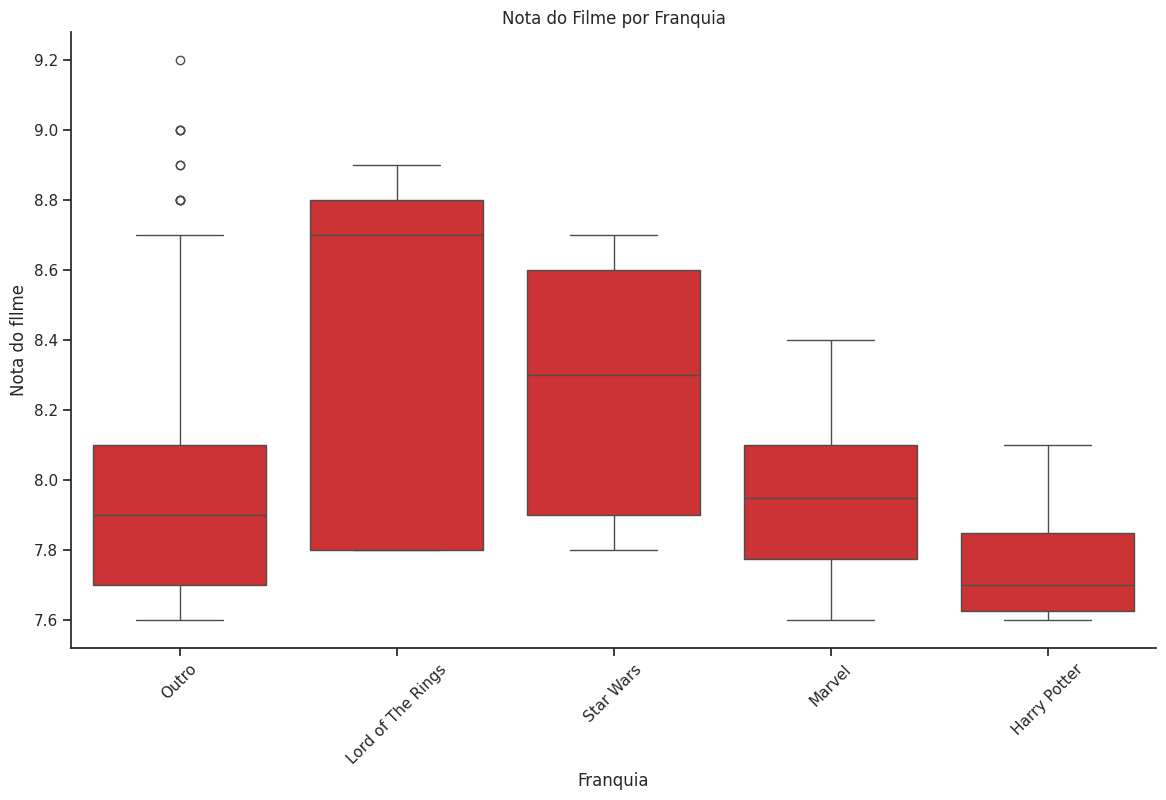

In [62]:
# Hipótese: a franquia está relacionada com a nota do filme
# Identifiquei no dataset que temos 3 franquias principais: Marvel, Harry Poter, Senhor dos aneis e Star Wars. Dessa forma, vou analisar se o faturamento médias é maior que a média geral

franquias = {
    'Star Wars': ['star wars','rogue one'],
    'Harry Potter': ['harry potter'],
    'Lord of The Rings':['lord of the rings','hobbit'],
    'Marvel':["iron man", "avengers: endgame", "avengers: infinity war",
    "spider-man: into the spider-verse", "the avengers",
    "captain america: civil war", "guardians of the galaxy",
    "captain america: the winter soldier", "deadpool", "deadpool 2",
    "thor: ragnarok"]
    }

# Função para identificar franquia:

def identificar_franquia(titulo):
  #Normalizar o título
  titulo = titulo.lower() # Coloca o título em miníscula

  for franquia, keywords in franquias.items(): # Seleciona os itens do dicionário franquias
    if any(keyword in titulo for keyword in keywords): #P Percorre o dicionário e busca de qual franquia é o filme
      return franquia
  return 'Outro' #Se não pertecer a nenhuma franquia

# Criar uma coluna de franquia
df_filmes_en_dummies['Franchise'] = df_filmes_en_dummies['Series_Title'].apply(identificar_franquia)

# Plotando a nota média por fraquia
plt.figure(figsize=(14,8))
sns.boxplot(y= 'IMDB_Rating', x ='Franchise', data = df_filmes_en_dummies)
plt.ylabel('Nota do fllme')
plt.xticks(rotation = 45)
plt.xlabel('Franquia')
plt.title('Nota do Filme por Franquia');

A franquia parece estar associada com a nota do filme

## 4 - Perguntas do desafio

### 4.1 - Qual filme você recomendaria para uma pessoa que você não conhece?

Para pessoas que não conheço, o ideal é recomendar filmes populares, com alta nota e de indicação etária livre (G)

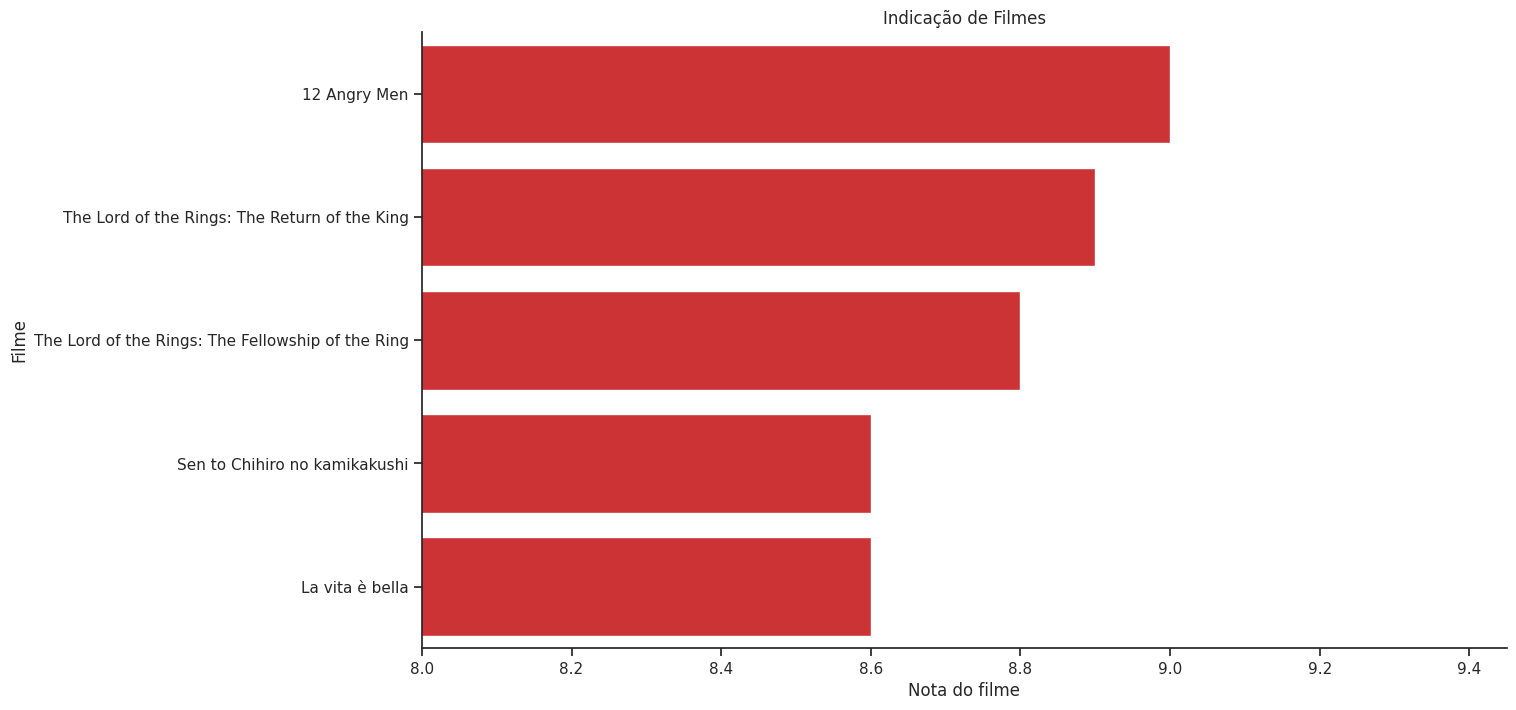

In [68]:
# Plotando os 5 filmes mais populares (grande número de votos) com classificação livre

# Selecionando filmes com classificação livre
livres = df_filmes_en_dummies[df_filmes_en_dummies['Certificate'] == 'G']

# Selecionando os filmes com nota alta e popularidade
filmes = livres.sort_values(by =['IMDB_Rating', 'No_of_Votes'], ascending = False)

# Selecionando apenas os 5 primeiros filmes
top5 = filmes.head()

# Plotando os filmes indicador
plt.figure(figsize=(14,8))
sns.barplot(x= 'IMDB_Rating', y = 'Series_Title', data = top5)
plt.ylabel('Filme')
plt.xlabel('Nota do filme')
plt.xlim(8,)
plt.title('Indicação de Filmes');

Dessa forma, eu recomendaria alguns dos 5 filmes listados no gráfico acima, visto que todos são populares, apresentam uma ótima nota e não possuem restrição de idade.

### 4.2 - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Já vimos que o gênero do filme influencia no faturanemento. Agora faremos análises por franquia e diretores

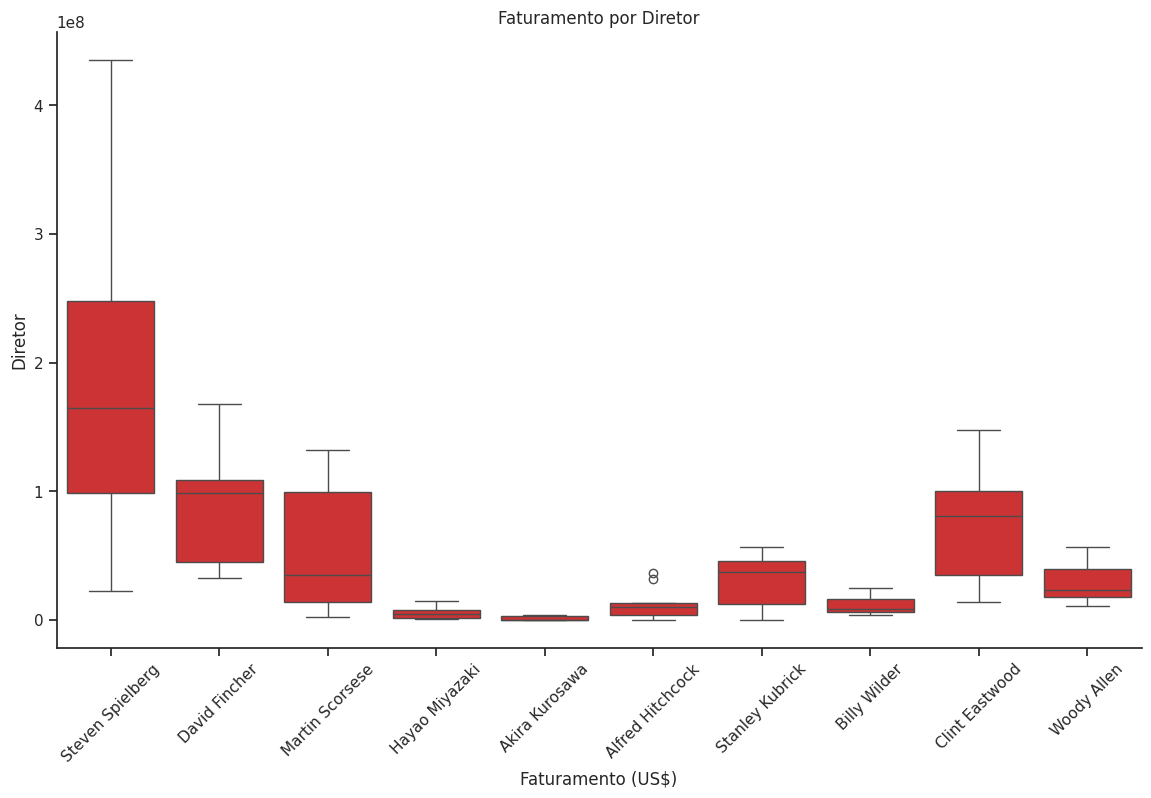

In [56]:
# Faturamento por diretor: diretores famosos faturam mais?

# Vendo quantos filmes cada diretor tem
qtd_filmes_dir = df_filmes_en_dummies['Director'].value_counts()

# Selecionando os 10 diretores com mais filmes
top_10_dir = qtd_filmes_dir.head(10).index

# Criando um dataset só com esse diretores
df_dir = df_filmes_en_dummies[df_filmes_en_dummies['Director'].isin(top_10_dir)]

# Plotando o gráfio
plt.figure(figsize=(14,8))
sns.boxplot(y= 'Gross', x ='Director', data = df_dir)
plt.ylabel('Diretor')
plt.xticks(rotation = 45)
plt.xlabel('Faturamento (US$)')
plt.title('Faturamento por Diretor');

Além de influenciar na nota do filme, o diretor também tem impacto no faturamento.

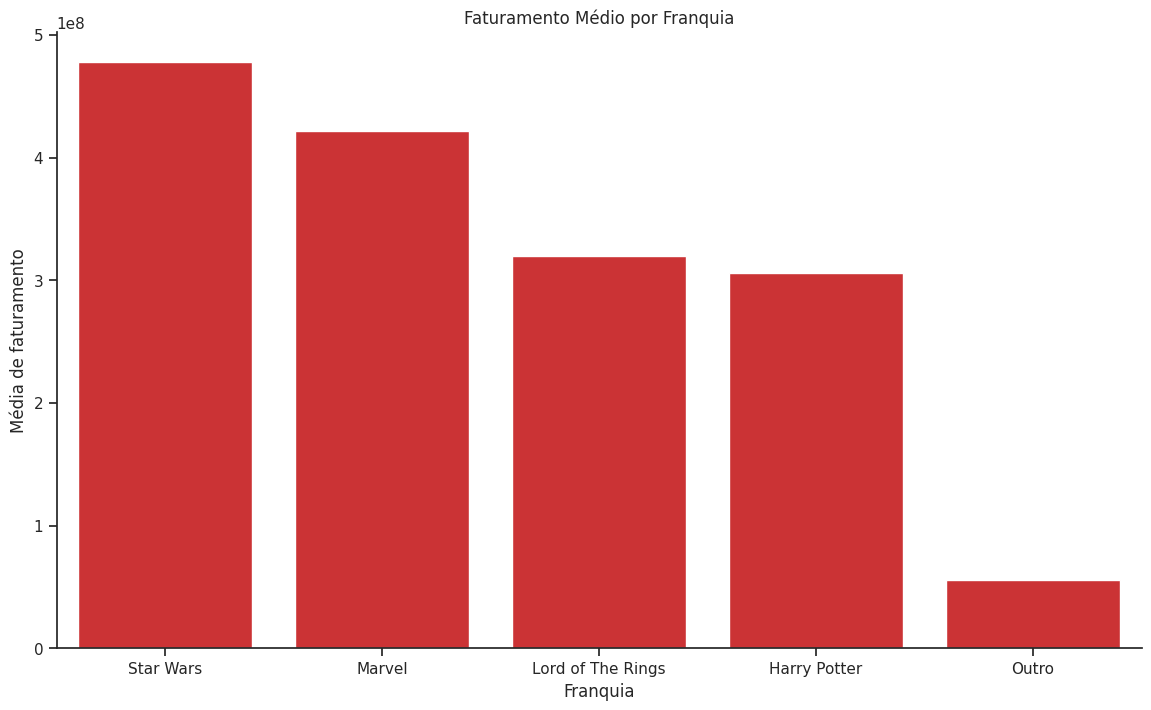

In [64]:
# Faturamento por franquias: vamos testar a hipótese de que franquias estão relacionadas com o maior faturamento

# Cálculo da média de faturamento por franquia
fat_franquia = df_filmes_en_dummies.groupby('Franchise')['Gross'].mean().reset_index()

# Plotando os 5 filmes mais populares (grande número de votos) com classificação livre

# Definindo a ordem das barras
ordem = ['Star Wars', 'Marvel', 'Lord of The Rings', 'Harry Potter', 'Outro']

# Plotando o faturamento por franquia
plt.figure(figsize=(14,8))
sns.barplot(x= 'Franchise', y = 'Gross', data = fat_franquia, order = ordem)
plt.ylabel('Média de faturamento')
plt.xlabel('Franquia')
plt.title('Faturamento Médio por Franquia');

Dessa forma, o gênero, diretor e franquias são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme

### 4.3 - Quais insights podem ser tirados com a coluna Overview?

a) É possível inferir o gênero do filme a partir dessa coluna?

In [31]:
from wordcloud import WordCloud # Faz a nuvem de palavras
import nltk # Para análise de texto
from nltk.corpus import stopwords # Para retirar palavras que atrapalham a análise

# Download das stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

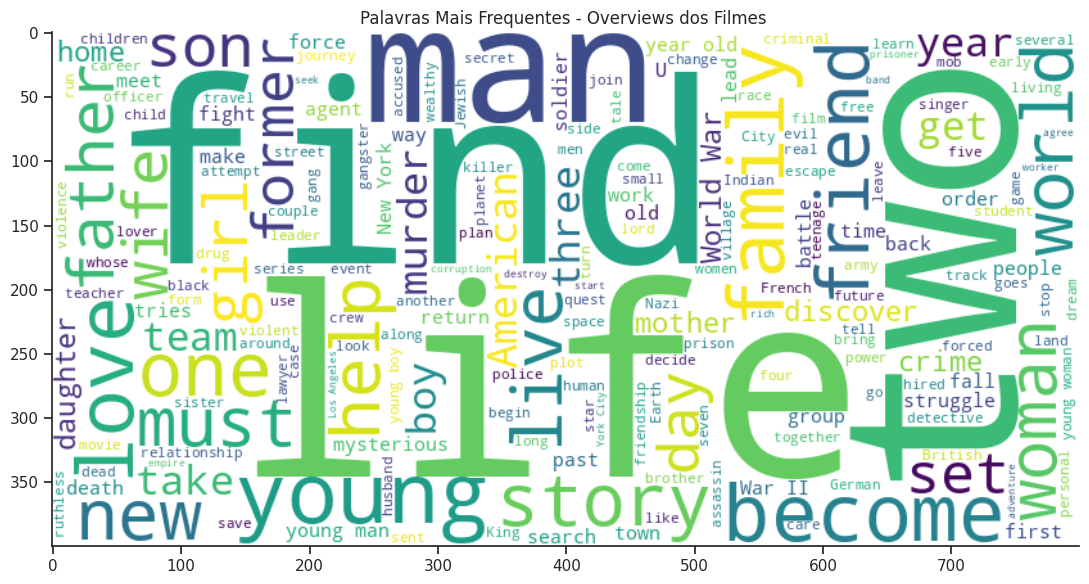

In [32]:
# Podemos analisar a coluna 'Overview' para ver quais são as palavras mais frequentes com a nuvem de palavras

# Carregamento as stopwords
stopwords_eng = set(stopwords.words('english'))

# Tratamento da coluna 'Overview'
  # Juntando todas os textos:
textos = ' '.join(df_filmes_en_dummies['Overview'])

# Criação da nuvem de palavras
wordcloud = WordCloud(
    width = 800,
    height = 400,
    stopwords = stopwords_eng,
    background_color = 'white').generate(textos)
plt.figure(figsize =(12,6))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.title('Palavras Mais Frequentes - Overviews dos Filmes ')
plt.tight_layout();


As palavras mais frequentes do overview foram: 'find', 'life', 'two', 'man', 'young', 'love', 'friend', 'family', 'become'. Isso sugere que os filmes nesse dataset provavelmente abordam temos relacionados a esses termos.

Caso eu não soubesse que o gênero mais frequente no dataset é drama, seria possível ter uma ideia dos gêneros presentes no dataset a partir de algumas palavras contidas na nuvem de palavras. Entretanto, não é totalmente confiável inferir o gênero apenas com a coluna overview, uma vez que alguns termos podem estar presente em vários gêneros.

Se o objetivo fosse identificar o gênero através dessa coluna, seria necessário aplicar técnicas de mineração de textos para extrair padrões.

## 5 - Análise Preditiva

Nesta etapa, vamos criar um modelo que permita fazer predições de novos dados.

### 5.1 - Explique como você faria a previsão da nota do imdb a partir dos dados.


De maneira geral, para realizar a análise preditiva, o primeiro passo é entender claramente o problema a ser resolvido. Em seguida, tratamos, exploramos e analisamos os dados disponíveis para verificar se eles úteis para resolver o problema. Para isso, uma etapa de limpeza e análise exploratória é fundamental. Por último, faz-se a modelagem, sempre de acordo com o problema.


No desafio em questão, precisamos prever a nota IMDB de um filme, que é uma avaliação feita pelos usuários (público que assiste aos filmes). Para isso, realizamos as seguintes etapas:

* Preparação dos dados: visa limpar e remover inconsistências nos dados;

* Análise exploratória: para identificar quais atributos podem estar relacionados com a nota;

* Pré-processamento dos dados: criação de variáveis dummies;

* Modelagem e avaliação do modelos;

* Predição de novos dados.


### 5.2 - Quais variáveis e/ou suas transformações você utilizou e por quê?

Com base na análise exploratória, identifiquei que as variáveis Meta_score, Run_time, No_of_votes, franquia e director apresentam influenciam sobre a nota do filme. Logo, utilizarei essas variáveis para a construção do modelo preditivo.

In [33]:
# Criando o df modelo com as variáveis que vamos usar
df_modelo = df_filmes_en_dummies[['Runtime', 'Meta_score', 'No_of_Votes', 'Franchise', 'Director', 'IMDB_Rating']]

# Dummização da coluna franquia
df_modelo = pd.get_dummies(df_modelo, columns = ['Franchise'], drop_first= True)

# Para usar a coluna Director, vamos calcular a média de nota de cada diretor
media_diretor = df_modelo.groupby('Director')['IMDB_Rating'].mean()

df_modelo['Director_mean'] = df_modelo['Director'].map(media_diretor)

# Preciso renomear as variáveis dummies de franquia
df_modelo= df_modelo.rename(columns= {'Franchise_Star Wars': 'Franchise_Star_Wars', 'Franchise_Lord of The Rings': 'Franchise_Lord_of_The_Rings'})

### 5.3 - Qual tipo de problema estamos resolvendo (regressão, classificação)?

Como o objetivo é prever o valor de uma variável numérica (nota do IMDB), temos um problema de regressão.

Caso o objetivo fosse classificar os filmes como 'bom' ou 'ruim', teríamos um problema de classificação.

### 5.4 - Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

Para prever a nota IMDB, poderiam ser escolhidos diferentes modelos, como regressão linear, árvores de regressão, SVR, entre outros. Neste projeto, optou-se pela regressão linear múltipla, devido a sua simplicidade e fácil compreensão.

Entretanto, esse modelo pressupõe uma relação linear entre as variáveis preditoras (features) e a target(alvo), o que pode limitar sua precisão em casos mais complexos.


#### Estimação do modelo de regressão linear múltipla com Statsmodels

In [34]:
# Criando uma fórmula com as minhas variáveis preditoras e a target

lista_colunas = list(df_modelo.drop(columns=['IMDB_Rating', 'Director']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "IMDB_Rating ~ " + formula_dummies_modelo

# Criando o modelo de regressão linear pelo pacote Statsmodels
modelo_filmes= sm.OLS.from_formula(formula_dummies_modelo, df_modelo).fit()

# Parâmetros do 'modelo_filmes'
modelo_filmes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IMDB_Rating   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          2.68e-192
Time:                        21:55:53   Log-Likelihood:                 338.62
No. Observations:                 852   AIC:                            -659.2
Df Residuals:                     843   BIC:                            -616.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.3826      0.242      5.723      0.000       0.908       1.857
Franchise_Lord_of_The_Rings[T.True]    -0.0867      0.101     -0.859      0.390      -0.285       0.111
Franchise_Marvel[T.True]             7.081e-05      0.082      0.001      0.999      -0.161       0.161
Franchise_Outro[T.True]                 0.1090      0.068      1.604      0.109      -0.024       0.242
Franchise_Star_Wars[T.True]             0.0101      0.100      0.100      0.920      -0.187       0.207
Runtime                                 0.0005      0.000      2.079      0.038    2.54e-05       0.001
Meta_score                              0.0036      0.000      7.571      0.000       0.003       0.004
No_of_Votes                           2.98e-07   1.94e-08     15.385      0.000     2.6e-07    3.36e-07
Director_mean                           0.7588      0.032     23.694      0.000       0.696       0.822
==============================================================================
Omnibus:                       43.932   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.008
Skew:                          -0.247   Prob(JB):                     1.29e-24
Kurtosis:                       4.690   Cond. No.                     1.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 ### 5.5 - Qual medida de performance do modelo foi escolhida e por quê?

 As principais medidas de performance para regressão são:

 * Coeficiente de Determinação (R²): mede o quanto da variação dos dados é explicada pelo modelo, ou seja, quão bem o modelo se ajustar aos dados. Quanto maior, melhor o modelo.

 * Erro Absoluto Médio (MAE): média entre os valores reais e o valores previstos (erros). Deve ser o menor possível

 * Erro Quadrático Médio (RMSE): média dos quadrados dos erros. Deve ser o menor possível.

 No presente projeto, a métrica escolhida foi o R², visto que ele apresenta uma interpretação fácil (quanto maior, melhor o modelo) e permite a comparação entre modelos.

 O primeiro modelo apresentou um R² de 0.661, o que indica que cerca de 66% da variação das notas IMDB é explicado pelas variáveis Meta_score, Run_time, No_of_votes, franquia e director.

 Os 34% da variação não explicada pelo modelo pode ser devido a outras variáveis não incluídas no modelo ou relações não lineares entre as variáveis. Então, para avaliar isso, faremos o procedimento stepwise para saber quais são as melhores variáveis preditoras.


### 5.6 - Predição de novos dados

Qual seria a nota do IMDB?

  'Series_Title': 'The Shawshank Redemption',

 'Released_Year': '1994',

 'Certificate': 'A',

 'Runtime': '142 min',

 'Genre': 'Drama',

 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',

 'Meta_score': 80.0,

 'Director': 'Frank Darabont',

 'Star1': 'Tim Robbins',

 'Star2': 'Morgan Freeman',

 'Star3': 'Bob Gunton',

 'Star4': 'William Sadler',

 'No_of_Votes': 2343110,

 'Gross': '28,341,469'}


In [35]:
# Adequando o novo filme à formula do modelo

novo_filme = {
    'Runtime': 142,
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Director': 'Frank Darabon',
    'Franchise': 'Outro'
}

df_novo_filme = pd.DataFrame([novo_filme])

# Dummies das franquias
df_novo_filme['Franchise_Lord_of_The_Rings'] = 0
df_novo_filme['Franchise_Marvel'] = 0
df_novo_filme['Franchise_Outro']= 1
df_novo_filme['Franchise_Star_Wars'] = 0

# Encontrando a média de nota do diretor 'Frank Darabon'
media_frank = df_modelo.loc[df_modelo['Director'] == 'Frank Darabon', 'Director_mean']
 #Caso não tenha, substitua pela média geral:
media_frank = media_frank.iloc[0] if not media_frank.empty else df_modelo['Director_mean'].mean()
df_novo_filme['Director_mean'] = media_frank

# Selecionando apenas as colunas do modelo
x = df_novo_filme[[
    'Runtime',
    'Meta_score',
    'No_of_Votes',
    'Franchise_Lord_of_The_Rings',
    'Franchise_Marvel',
    'Franchise_Outro',
    'Director_mean',
     'Franchise_Star_Wars']]

# Adicionando uma constante para a predição
x = sm.add_constant(x)

# Prever a nota
nota_prevista = modelo_filmes.predict(x)

print(f'A nota IMDB prevista do novo filme é: {nota_prevista.values[0]}')

A nota IMDB prevista do novo filme é: 8.570369357179947


# Criando o modelo pickle

In [210]:
import pickle

# Definindo um nome para o arquivo

nome = 'LH_CD_TANDARAJESUS.pkl'

# Abrindo o arquivo na modo de escrita
with open (nome, 'wb') as arquivo:
  # Usando a função dump para salvar o modelo
  pickle.dump(modelo_filmes, arquivo)

print(f'O modelo de regressão foi salvo como: {nome}')

O modelo de regressão foi salvo como: LH_CD_TANDARAJESUS.pkl


# Criando o requirements.txt

In [38]:
# O pip freeze permite salvar automaticamente todas as dependências do projeto
!pip freeze > requirements.txt